# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


intalling the tensor flow

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

importing the numerical functions and other keras models and layers.
from keras getting the mnist dataset

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

load the dataset into train and test

(60000, 28, 28)


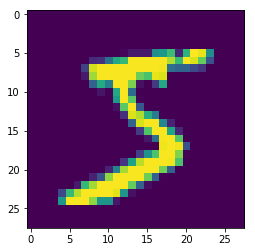

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

plot the 1st train value from the array using matplotlib

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

reshape the train and test to 28 * 28 * 1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

convert them into float and do the normalization

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

getting the class of 10 images/values

In [34]:
from keras.layers import Activation
model = Sequential()
#26
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#24
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(16, 1,1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.13))

model.add(Convolution2D(16, 3, 3, activation='relu'))

model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.13))

#model.add(Convolution2D(10, 3, 3, activation='relu'))

#model.add(Convolution2D(10, 3, 3, activation='relu'))

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]


followed the pattern/architecture of 2 times convoluation and one max pooling, dropout and one more time the same process 
then at last we convolve with 4 to get 1 * 1 we didnt use relu at last because we need negative value for backpropagation
then flattern the data and do softmax 

In [35]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 24, 24, 16)        272       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 10, 10, 16)        2320      
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 8, 8, 16)          2320      
__________

model summary shows our parameters and other convolutions, dropouts what we have used.


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

compile the mode with optimizer and loss

In [37]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=60, verbose=1, validation_data=(X_test,Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 22s 367us/step - loss: 0.2249 - acc: 0.9304 - val_loss: 0.0556 - val_acc: 0.9839
Epoch 2/60
60000/60000 [==============================] - 21s 353us/step - loss: 0.0872 - acc: 0.9732 - val_loss: 0.0418 - val_acc: 0.9862
Epoch 3/60
60000/60000 [==============================] - 21s 355us/step - loss: 0.0664 - acc: 0.9795 - val_loss: 0.0374 - val_acc: 0.9873
Epoch 4/60
60000/60000 [==============================] - 21s 353us/step - loss: 0.0531 - acc: 0.9836 - val_loss: 0.0346 - val_acc: 0.9889
Epoch 5/60
60000/60000 [==============================] - 21s 354us/step - loss: 0.0477 - acc: 0.9851 - val_loss: 0.0318 - val_acc: 0.9902
Epoch 6/60
60000/60000 [==============================] - 21s 354us/step - loss: 0.0431 - acc: 0.9862 - val_loss: 0.0275 - val_acc: 0.9921
Epoch 7/60
60000/60000 [==============================] - 21s 353us/step - loss: 0.0379 - acc: 0.9879 - val_loss: 0.

fit the model with the best Epoch and accuracy, here 22 and 38 Epoch gives the best accuracy

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [39]:
print(score)

[0.02921437601087582, 0.9938]


print the predicted score

In [0]:
y_pred = model.predict(X_test)

In [41]:
print(y_pred[:9])
print(y_test[:9])

[[3.1749764e-15 3.6826256e-17 3.3026515e-10 4.1803772e-10 1.6980236e-22
  1.6210237e-17 3.2024016e-25 1.0000000e+00 1.6299972e-16 5.8766936e-11]
 [5.3622221e-15 1.8861395e-09 1.0000000e+00 9.9231254e-16 1.2174537e-16
  6.2123853e-24 5.6784738e-12 8.6676544e-17 1.8059697e-17 5.1248839e-18]
 [8.2838888e-08 9.9991763e-01 1.1297191e-07 2.9323132e-08 7.4428121e-05
  8.8367631e-07 5.6164558e-06 1.1227897e-06 4.7252872e-08 7.8508712e-08]
 [9.9999988e-01 1.3965315e-23 3.1840548e-11 6.2136902e-12 2.0223657e-14
  4.2765027e-09 7.1997505e-08 7.4973422e-16 3.0948422e-09 6.5096012e-10]
 [7.0618187e-18 7.6640120e-18 6.4606389e-19 6.8958047e-20 1.0000000e+00
  1.3000869e-17 9.1748703e-16 2.1903812e-17 5.6706380e-12 5.7644662e-08]
 [1.9523915e-08 9.9994600e-01 1.7349461e-07 1.2498595e-08 5.2023403e-05
  1.6175024e-09 4.8918626e-08 1.4955565e-06 5.9277263e-09 1.8264406e-07]
 [2.0937935e-26 6.6924033e-10 1.2338398e-18 1.1783170e-19 1.0000000e+00
  6.4041117e-17 2.7543747e-24 4.3156193e-10 4.2006352e-08 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
add the layers to dictonary

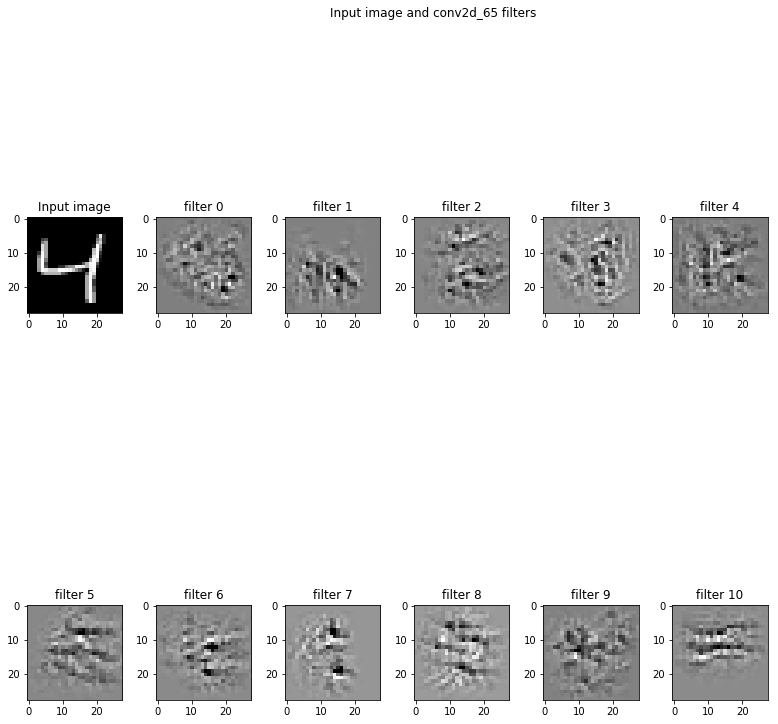

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_65'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

visualize the convolution and see the filters .